In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.001)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 100,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-1, 1],
    c1 = [0.1, 2.0],
    c2 = [0.5, 2.0],
    w = 1.2,
    w_decay = 0.95))

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 300
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

159/300: 	0.6479087900892596
update local, 0.6776016092746058
update local, 0.6606254934150482
update local, 0.6494596249589296
update local, 0.6571449208482404
update local, 0.667849175283842
update local, 0.6639711611738829
update global 0.6479087900892596
update local, 0.6632309672988463
update local, 0.6587982177734375
Iteration 160/300: 	0.6479087900892596
update local, 0.6592452860324183
update local, 0.6556678843275409
update local, 0.6829755551347109
update local, 0.6478103209878797
update global 0.6478103209878797
update local, 0.6589580785448306
update local, 0.6507250349098277
update local, 0.6563534602940639
Iteration 161/300: 	0.6478103209878797
update local, 0.6556685973550672
update global 0.6478103209878797
update local, 0.6522856382566078
update local, 0.6517664829147196
update local, 0.6565171001113463
Iteration 162/300: 	0.6478103209878797
update local, 0.6558464264201227
update global 0.6478103209878797
update local, 0.6552224560318706
update local, 0.64401430504344

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

[0.8568352672541253, 0.8568352672541253, 0.8568352672541253, 0.8527233801155447, 0.7847677926036799, 0.7847677926036799, 0.783662813846196, 0.783662813846196, 0.7444919336622007, 0.7444919336622007, 0.7444919336622007, 0.7287664680837471, 0.7287664680837471, 0.7287664680837471, 0.682880152051694, 0.682880152051694, 0.682880152051694, 0.682880152051694, 0.682880152051694, 0.682880152051694, 0.682880152051694, 0.682880152051694, 0.682880152051694, 0.682880152051694, 0.682880152051694, 0.682880152051694, 0.682880152051694, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.6632752463082286, 0.663275246308

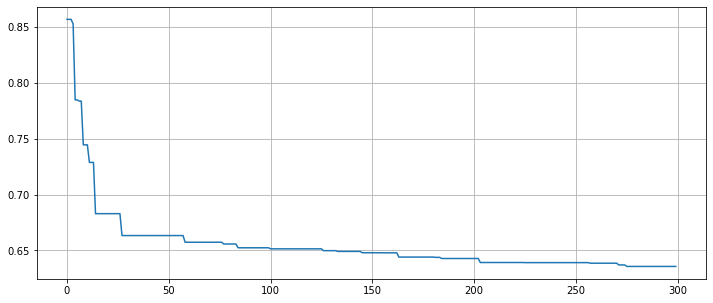

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [13]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.9428745 ]
 [0.0406079 ]
 [0.01651764]]
[1. 0. 0.] <-> [[0.93351346]
 [0.04595466]
 [0.02053187]]
[1. 0. 0.] <-> [[0.9382671 ]
 [0.04310301]
 [0.0186299 ]]
[1. 0. 0.] <-> [[0.93264145]
 [0.04647437]
 [0.02088413]]
[1. 0. 0.] <-> [[0.40979552]
 [0.28294194]
 [0.30726254]]
[0. 0. 1.] <-> [[0.00879808]
 [0.42726225]
 [0.56393963]]
[1. 0. 0.] <-> [[0.88735574]
 [0.07207105]
 [0.04057322]]
[0. 0. 1.] <-> [[0.94484097]
 [0.03931727]
 [0.01584167]]
[1. 0. 0.] <-> [[0.8216392 ]
 [0.11112531]
 [0.06723557]]
[1. 0. 0.] <-> [[0.6213977 ]
 [0.20479365]
 [0.17380865]]
[1. 0. 0.] <-> [[0.71963394]
 [0.16239847]
 [0.11796756]]
[1. 0. 0.] <-> [[0.9401886 ]
 [0.04194229]
 [0.01786909]]
[1. 0. 0.] <-> [[0.9455296 ]
 [0.03870968]
 [0.01576068]]
[1. 0. 0.] <-> [[0.47907767]
 [0.26316896]
 [0.2577533 ]]
[1. 0. 0.] <-> [[0.9453076 ]
 [0.03884288]
 [0.01584944]]
[1. 0. 0.] <-> [[0.9091233 ]
 [0.0600917 ]
 [0.03078504]]
[1. 0. 0.] <-> [[0.9309963 ]
 [0.04745206]
 [0.02155168]]
[1. 0. 0.] <->